In [3]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = ['developed_given_support_2015',
        'developing_received_support_2015',
        'food_security_index_2012',
        'usaid_food_relief_received']

In [6]:
resources = [pd.read_csv('Data/{}'.format(i)) for i in data]

In [7]:
give_sup = resources[0]
rec_sup = resources[1]
FSI = resources[2]
USAID = resources[3]

## Exploratory Data Analysis

In [15]:
give_sup.head()

,Unnamed: 0,Country,ISO3,Subcontinents,Groups,Remote Country ISO3,Producer Support Estimate,General Services Support Estimate,Support to the Marine Sector,Support to the Aquaculture Sector,...,"Simple Average Applied MFN tariff, Agriculture",Trade Bias Index,Trade Reduction Index,Time to Export,"Logistics Performance Index, Transport",Agricultural Spending Intensity,Degree to Which FNS Features in Citizen Priorities,Food Safety Score,Secure Access to Land (Women),Access to Financial Services (Women)
0,0,australia,AUS,Australasia,"DAC,East Asia & Pacific",0.0,0.0598,0.0486,0.0008,0.0000,...,1.22,0.000000,0.000000,9.000000,3.816468,8.58,0.0033,100.0,0.0,0.0
1,1,canada,CAN,Northern America,"DAC,North America",0.0,0.3376,0.1120,0.0310,0.0018,...,15.89,-0.281111,0.139755,8.000000,4.141614,11.39,0.0024,100.0,0.0,0.0
2,2,czech-republic,CZE,Eastern Europe,"DAC,Europe & Central Asia",0.0,0.4366,0.0726,0.0000,0.0089,...,13.22,0.020533,-0.015139,17.000000,3.357148,25.74,0.0952,100.0,0.0,0.0
3,3,european-union,EUU,0,"DAC,Europe & Central Asia",0.0,0.4775,0.0790,0.0000,0.0000,...,13.22,0.000000,0.000000,11.571429,3.557656,0.00,0.0000,0.0,0.0,0.0
4,4,germany,DEU,Western Europe,"DAC,Europe & Central Asia",0.0,0.9009,0.1492,0.0002,0.0003,...,13.22,-0.024613,0.018952,9.000000,4.439356,27.02,0.0000,100.0,0.0,0.0


In [16]:
rec_sup.head()

,Unnamed: 0,Country,ISO3,Subcontinents,Groups,Remote Country ISO3,Producer Support Estimate,General Services Support Estimate,Support to the Marine Sector,Support to the Aquaculture Sector,...,Access to Financial Services (Women),Government Spending on Agriculture,ODA to FNS,Official Flows to FNS-China,Official Flows to FNS-India,Official Flows to FNS-Brazil,Other Official Flows (DAC),FDI to Agriculture,Philanthropy,NGO
0,0,afghanistan,AFG,Southern Asia,"Fragile states,Low income,South Asia,Developin...",0,0.0,0.0,0.0,0.0,...,0.5,5.949195,29.080320,0.000000,1.151698,0.000318,3.543834,0.000000,0.041725,1.884676
1,1,albania,ALB,Southern Europe,"Europe & Central Asia,Upper middle income,Deve...",0,0.0,0.0,0.0,0.0,...,0.0,61.519814,9.959836,0.000000,0.000000,0.000000,14.693549,1.946169,0.000000,0.842808
2,2,algeria,DZA,Northern Africa,"Upper middle income,Developing Country,Middle ...",0,0.0,0.0,0.0,0.0,...,0.5,179.633209,0.831544,0.000000,0.000000,0.007779,0.231168,0.456436,0.000000,0.000000
3,3,angola,AGO,Middle Africa,"Sub-Saharan Africa,Upper middle income,Develop...",0,0.0,0.0,0.0,0.0,...,0.5,29.463154,2.610987,25.015312,0.000000,0.018503,0.757505,3.467631,9.254544,1.243052
4,4,antigua-and-barbuda,ATG,Caribbean,Developing Country,0,0.0,0.0,0.0,0.0,...,0.0,0.000000,54.430641,0.000000,0.000000,0.000000,102.050575,0.000000,0.000000,0.000000


In [20]:
rec_sup.describe()

,Unnamed: 0,Producer Support Estimate,General Services Support Estimate,Support to the Marine Sector,Support to the Aquaculture Sector,Support to the Marine Marketing and Processing Sector,Share of GNI for FNS Aid,Share of GNI for Nutrition Aid,Share of GNI for AR4D Aid,Lack of Enough Money to Buy Food,...,Access to Financial Services (Women),Government Spending on Agriculture,ODA to FNS,Official Flows to FNS-China,Official Flows to FNS-India,Official Flows to FNS-Brazil,Other Official Flows (DAC),FDI to Agriculture,Philanthropy,NGO
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,177.000000,177.000000,...,177.000000,177.000000,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,88.000000,0.013208,0.002671,0.000091,0.000031,0.000007,2.902270e-07,4.230032e-07,0.000037,0.252694,...,0.194915,57.296002,12.891111,2.067812e+12,0.092599,0.043355,9.564467,10.504597,0.160888,1.930828
std,51.239633,0.053200,0.009417,0.000823,0.000230,0.000065,3.642495e-06,4.380801e-06,0.000391,0.242489,...,0.261393,96.421306,20.274792,1.064734e+13,0.529124,0.269795,32.404947,32.574299,0.759033,19.985354
min,0.000000,-0.143375,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,1.739619,0.245282,0.000000e+00,0.000000,0.000000,0.006934,0.000000,0.000000,0.000000
50%,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.237179,...,0.000000,17.815279,6.414311,0.000000e+00,0.000000,0.000000,2.104407,0.266828,0.000000,0.005632
75%,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.448480,...,0.500000,62.444710,16.088856,4.530933e-02,0.000000,0.000000,6.657068,4.925468,0.076375,0.300242
max,176.000000,0.314488,0.064594,0.010499,0.002560,0.000703,4.842836e-05,5.496187e-05,0.005011,0.850538,...,1.000000,531.574341,138.886398,1.058443e+14,4.699135,3.331256,381.685638,241.597534,9.254544,265.932831


In [14]:
rec_sup.columns

Index(['Unnamed: 0', 'Country', 'ISO3', 'Subcontinents', 'Groups',
       'Remote Country ISO3', 'Producer Support Estimate',
       'General Services Support Estimate', 'Support to the Marine Sector',
       'Support to the Aquaculture Sector',
       'Support to the Marine Marketing and Processing Sector',
       'Share of GNI for FNS Aid', 'Share of GNI for Nutrition Aid',
       'Share of GNI for AR4D Aid', 'Lack of Enough Money to Buy Food',
       'Undernourishment', 'Average Dietary Energy Supply Adequacy',
       'Rural Multi Dimensional Poverty Headcount',
       'Rural Poverty Headcount Ratio (At $1.25 PPP A Day)',
       'Food Consumption Score', 'Average Protein Supply',
       'Percent of Calories from Staples', 'Under-5 Wasting',
       'Under-5 Stunting', 'Anemia in Children',
       'Cereal Yield (kg per hectare)', 'Agricultural Value Added Per Worker',
       'Cold Storage', 'Family Farm Prevalence',
       'Percent of Area Devoted to Modern Varieties',
       'Agricul

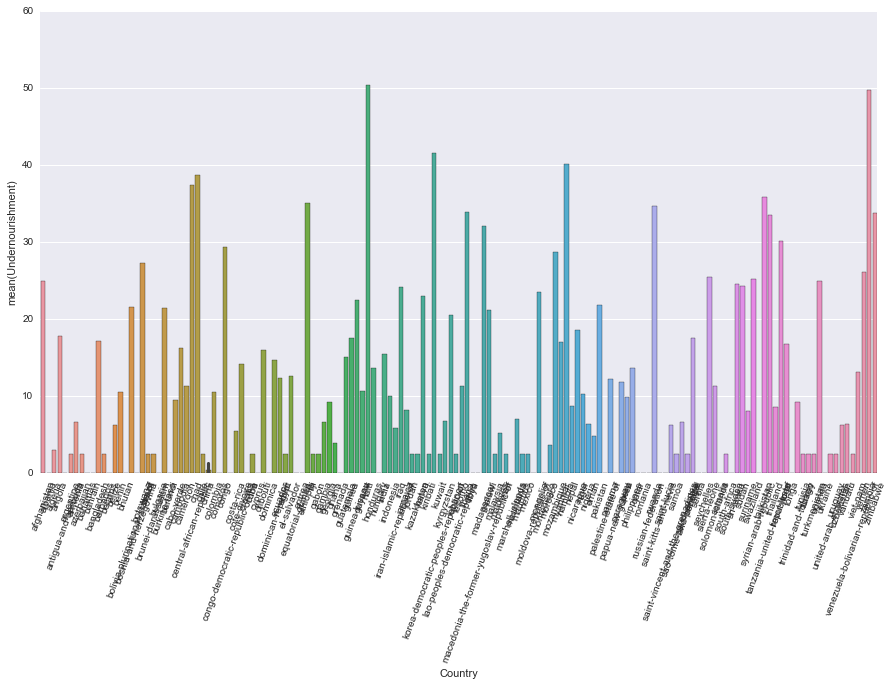

In [89]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8.27)
Total_Estimate = sns.barplot(x='Country', y='Undernourishment', data=rec_sup, ax=ax)
for item in Total_Estimate.get_xticklabels():
    item.set_rotation(70)

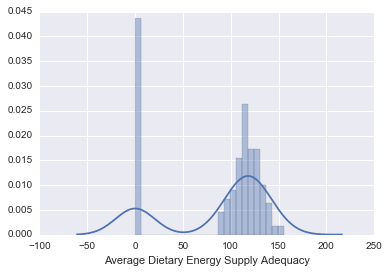

In [117]:
mu = rec_sup
mu = mu.loc[(mu!=0).any(axis=1)]
rec_sup_sample = pd.DataFrame(mu.sample(100))
µ = mu['Average Dietary Energy Supply Adequacy']
xbar = rec_sup_sample['Average Dietary Energy Supply Adequacy']
sns.distplot(µ, bins=25);

## Machine Learning Tests

In [8]:
ignore = ['Unnamed: 0', 'Country', 'ISO3', 'Subcontinents', 'Groups',
       'Remote Country ISO3']

In [9]:
x = rec_sup.drop(ignore, axis=1)
y = rec_sup['Food Safety Score']

In [10]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                 loss='ls',
                                 n_estimators=100,
                                 random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                        learning_rate=0.1,
                        loss='linear',
                        n_estimators=100,
                        random_state=1)

In [12]:
def get_scores(x,y,model):
    X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.2)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    r2 = r2_score(y_test,pred)
    print('{0} Train CV | MSE: {1:.3f} | R2: {2:.3f}'.format(type(model).__name__,mse,r2))

get_scores(x,y,rf)
get_scores(x,y,gdbr)
get_scores(x,y,abr)

RandomForestRegressor Train CV | MSE: 1.452 | R2: 0.999
GradientBoostingRegressor Train CV | MSE: 0.028 | R2: 1.000
AdaBoostRegressor Train CV | MSE: 0.028 | R2: 1.000


In [164]:
gdbr_1 = GradientBoostingRegressor(learning_rate=1,
                                 loss='ls',
                                 n_estimators=100,
                                 random_state=1)
get_scores(x,y,gdbr_1)

GradientBoostingRegressor Train CV | MSE: 20.715 | R2: 0.985


In [165]:
def stage_score_plot(model, train_x, train_y, test_x, test_y):
    '''
    INPUT:
     model: GradientBoostingRegressor or AdaBoostRegressor
     train_x: 2d numpy array
     train_y: 1d numpy array
     test_x: 2d numpy array
     test_y: 1d numpy array

    Create a plot of the number of iterations vs the MSE for the model for
    both the training set and test set.
    '''
    model.fit(train_x,train_y)
    train_scores = [mean_squared_error(train_y, train_predict) for train_predict in model.staged_predict(train_x)]
    test_scores = [mean_squared_error(test_y, test_predict) for test_predict in model.staged_predict(test_x)]
    plt.plot(train_scores, label = model.__class__.__name__ + " Train - learning rate " + str(model.learning_rate), ls = '--')
    plt.plot(test_scores,label = model.__class__.__name__ + " Test - learning rate " + str(model.learning_rate))
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title(model.__class__.__name__)

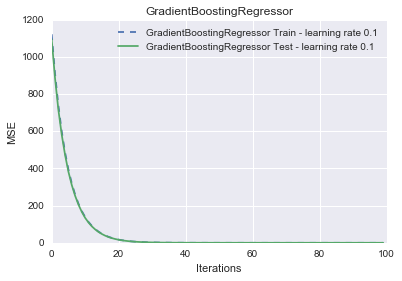

In [166]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 1, test_size = 0.2)
stage_score_plot(gdbr, train_x, train_y, test_x, test_y)
plt.legend()
plt.show()

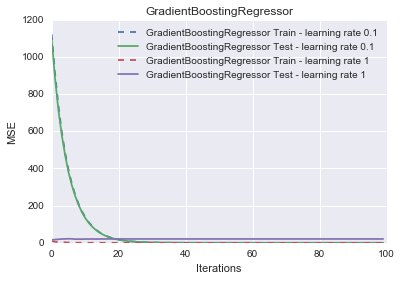

In [167]:
stage_score_plot(gdbr, train_x, train_y, test_x, test_y)
stage_score_plot(gdbr_1, train_x, train_y, test_x, test_y)
plt.legend()
plt.show()

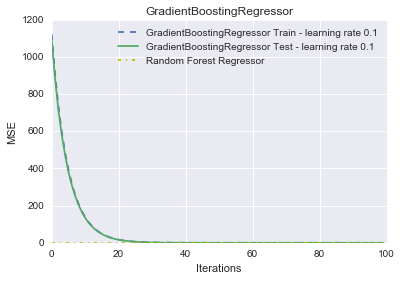

In [168]:
rf.fit(train_x, train_y)
p = rf.predict(test_x)
stage_score_plot(gdbr, train_x, train_y, test_x, test_y)
plt.axhline(mean_squared_error(test_y,p), label = 'Random Forest Regressor', ls='-.', c = 'y')
plt.legend()
plt.show()

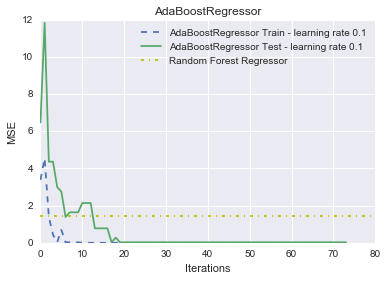

In [169]:
rf.fit(train_x, train_y)
p = rf.predict(test_x)
stage_score_plot(abr, train_x, train_y, test_x, test_y)
plt.axhline(mean_squared_error(test_y,p), label = 'Random Forest Regressor', ls='-.', c = 'y')
plt.legend()
plt.show() 

In [170]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [1, 2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(train_x, train_y)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.2s


best parameters: {'bootstrap': True, 'n_estimators': 20, 'max_features': None, 'max_depth': None, 'min_samples_split': 1, 'random_state': 1, 'min_samples_leaf': 2}


[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:    8.4s finished


In [171]:
best_rf_model.fit(train_x,train_y)
p1 = best_rf_model.predict(test_x)
mean_squared_error(test_y,p1)

1.540020336612653

In [172]:
gradient_boosting_grid = {'learning_rate': [0.2,0.3],
                          'max_features': [0.5,0.51],
                          'max_depth': [4,5],
                          'min_samples_leaf': [3,4],
                          'n_estimators': [130,150],
                          'random_state': [1]}

gdbr_gridsearch = GridSearchCV(GradientBoostingRegressor(),
                             gradient_boosting_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gdbr_gridsearch.fit(train_x, train_y)

print("best parameters:", gdbr_gridsearch.best_params_)

best_gdbr_model = gdbr_gridsearch.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s


best parameters: {'max_features': 0.5, 'learning_rate': 0.3, 'n_estimators': 130, 'max_depth': 5, 'random_state': 1, 'min_samples_leaf': 4}


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.3s finished


In [173]:
gdbr_gridsearch.best_params_

{'learning_rate': 0.3,
 'max_depth': 5,
 'max_features': 0.5,
 'min_samples_leaf': 4,
 'n_estimators': 130,
 'random_state': 1}

In [174]:
best_gdbr_model.fit(train_x,train_y)
p2 = best_gdbr_model.predict(test_x)
mean_squared_error(test_y,p2)

33.009793780177375

In [13]:
adaboosting_grid = {'learning_rate': [0.1],
                    'n_estimators': [20,40,50,100],
                    'loss': ['linear'],
                    'random_state': [1]}

abr_gridsearch = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor()),
                             adaboosting_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
abr_gridsearch.fit(train_x, train_y)

print("best parameters:", abr_gridsearch.best_params_)
best_abr_model = abr_gridsearch.best_estimator_

NameError: name 'train_x' is not defined

In [176]:
best_abr_model.fit(train_x,train_y)
p3 = best_abr_model.predict(test_x)
mean_squared_error(test_y,p3)

0.027777777777777776

In [2]:
sample = test_x.iloc[0]

NameError: name 'test_x' is not defined

In [1]:
sample

NameError: name 'sample' is not defined

In [188]:
sample_result = test_y.iloc[0]

In [189]:
prediction_test = best_abr_model.predict(sample)
prediction_test

/Users/victorvulovic/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 60.])

In [190]:
sample_result

60.0

## More dataset exploration

In [93]:
FSI.describe()

,Unnamed: 0,1.1) Food consumption as a share of household expenditure % of total household expenditure,1.2) Proportion of population under global poverty line % of population living under $3.10/day 2011 PPP,1.3) Gross domestic product per capita (US$ PPP) US$ at PPP / capita,1.4) Agricultural import tariffs %,1.5) Presence of food safety net programmes Qualitative assessment (0-4),1.6) Access to financing for farmers Qualitative assessment (0-4),2.1.1) Average food supply kcal/capita/day,2.1.2) Dependency on chronic food aid Qualitative assessment (0-2),2.2) Public expenditure on agricultural R&D Rating 1-9,...,3.5.2) Percentage of population with access to potable water %,3.5.3) Presence of formal grocery sector Qualitative assessment (0-2),4.1) Prevalence of undernourishment %,4.2.1) Percentage of children stunted %,4.2.2) Percentage of children underweight %,4.3) Intensity of food deprivation kcal/person/day,4.4) Human Development Index Rating 0-1,4.5) Global Gender Gap Index Rating 0-1,4.6) EIU Democracy Index Rating 1-10; 10=most democratic,4.7) Prevalence of Obesity %
count,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,58.00000,29.884956,26.249558,18711.362832,15.645133,2.433628,2.300885,2796.292035,1.407080,2.256637,...,86.831858,1.318584,14.314159,21.437168,11.408850,75.601770,0.666938,0.678982,5.752212,15.595575
std,32.76431,14.138367,31.074301,20838.516591,9.346218,1.348783,1.368556,544.109605,0.715107,1.821394,...,15.594151,0.804735,11.041609,17.050561,11.809224,90.148542,0.185736,0.062357,2.216903,9.253266
min,2.00000,6.800000,0.000000,657.000000,0.200000,0.000000,0.000000,1605.000000,0.000000,0.000000,...,47.500000,0.000000,5.000000,0.000000,0.000000,1.000000,0.286000,0.487000,1.500000,2.000000
25%,30.00000,16.900000,0.000000,3556.000000,11.000000,1.000000,1.000000,2301.000000,1.000000,1.000000,...,80.000000,1.000000,5.000000,4.300000,1.800000,8.000000,0.500000,0.646000,3.700000,5.800000
50%,58.00000,30.700000,11.900000,11375.000000,13.400000,2.000000,2.000000,2816.000000,2.000000,2.000000,...,92.500000,2.000000,9.000000,17.500000,6.000000,35.000000,0.698000,0.682000,5.900000,17.800000
75%,86.00000,41.900000,49.000000,28474.000000,17.800000,4.000000,4.000000,3236.000000,2.000000,3.000000,...,99.500000,2.000000,21.400000,37.900000,18.300000,114.000000,0.813000,0.717000,7.600000,22.500000
max,114.00000,68.000000,96.900000,134073.000000,66.100000,4.000000,4.000000,3819.000000,2.000000,9.000000,...,100.000000,2.000000,57.000000,57.700000,43.500000,490.000000,0.943000,0.840000,9.800000,38.100000


In [140]:
USAID.head()

,Assistance Type,Recipient Country,Program Name,Unit Name,Fiscal Year,Obligations ($US)
0,Economic,Afghanistan,Food For Education,Constant 2011 $US,2003.0,4042733
1,Economic,Afghanistan,Food For Education,Constant 2011 $US,2004.0,2667199
2,Economic,Afghanistan,Food For Education,Constant 2011 $US,2005.0,3326066
3,Economic,Afghanistan,Food For Education,Constant 2011 $US,2006.0,395486
4,Economic,Afghanistan,Food For Education,Historical $US,2003.0,3358043


In [138]:
total_received = pd.DataFrame(USAID.groupby(['Recipient Country', 'Fiscal Year'])["Obligations ($US)"].sum())

In [139]:
total_received

Obligations ($US)
Recipient Country              Fiscal Year                   
Afghanistan                    1999.0                48423480
                               2000.0                53838059
                               2001.0               101214220
                               2002.0                 3406122
                               2003.0                 7400776
                               2004.0                23385292
                               2005.0                16313434
                               2006.0                37289722
                               2008.0                41995984
                               2011.0                53697060
Albania                        1992.0                38882727
                               1993.0                18665425
                               1999.0                 6251736
                               2001.0                17122350
                               2002.0                 5393726
                               2003.0                18017844
                               2004.0                10836794
Algeria                        2001.0                 5780024
                               2003.0                 2451634
                               2004.0                 3155237
Angola                         1992.0                 4860341
                               1993.0                73662948
                               1994.0                19703160
                               1998.0                 7027203
                               2000.0                45614050
                               2001.0                25097231
                               2002.0                 9735263
                               2003.0                  855420
                               2004.0                 2406477
                               2005.0                  634099
...                                                       ...
Uruguay                        1990.0                 4585177
Uzbekistan                     1993.0                  746617
                               1994.0                 9280956
                               2003.0                34067191
                               2004.0                 4635366
Vietnam                        1999.0                13031072
                               2000.0                13291493
                               2001.0                24247061
                               2003.0                49244300
                               2004.0                29108665
                               2005.0                  279435
                               2006.0                18493563
West Bank/Gaza                 2001.0                19665998
Western Europe (not specified) 1991.0                87636529
                               1992.0                72905114
World (not specified)          1999.0                  230353
                               2000.0                21531576
                               2011.0                 3338674
Yemen                          1999.0                90034295
                               2000.0               119536638
                               2001.0                86572635
                               2004.0                44268904
Zambia                         1992.0               157391478
                               2001.0                 2678174
                               2002.0                 5870487
                               2004.0                 6513690
                               2010.0                 7319526
Zimbabwe                       1992.0                48588531
                               1999.0                 2969827
                               2011.0                 3246354

[729 rows x 1 columns]